# Goal
The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).

# Inspiration
- Is it possible to predict % Silica Concentrate every minute?
- How many steps (hours) ahead can we predict % Silica in Concentrate? This would help engineers to act in predictive and optimized way, mitigatin the % of iron that could have gone to tailings.
- Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column (as they are highly correlated)?

## Content
Column **1** shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.<br>
Columns **2-3** are quality measures of the iron ore pulp right before it is fed into the flotation plant.<br>
Column **4-8** are the most important variables that impact in the ore quality in the end of the process. <br>
Columns **9-22**, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. <br>
Columns **23-24** are the final iron ore pulp quality measurement from the lab.<br>

Target is to predict the column 25, which is the % of silica in the iron ore concentrate.

### Data Source
https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process


# Loading and Cleaning Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')
df = data.copy()

In [3]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [4]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

#### Cleaning needed
1. Convert date column to datetime object and Shorten column names
2. Convert columns to float data type. For example, 55,2 to 55.2.
3. Check for contextual outliers
4. to be added........

In [5]:
# 1. Convert date column to datetime object and Shorten column names
df['date'] = pd.to_datetime(df['date'])
df.columns = ['date', '%_iron_feed', '%_silica_feed', 'starch_flow', 'amina_flow',
       'ore_pulp_flow', 'ore_pulp_pH', 'ore_pulp_density',
       'FC1_air', 'FC2_air','FC3_air', 'FC4_air','FC5_air', 'FC6_air','FC7_air', 
       'FC1_level','FC2_level','FC3_level','FC4_level','FC5_level','FC6_level','FC7_level',
       '%_iron_conc', '%_silica_conc']

In [6]:
# 2. Convert columns to float data type.
for col in df.columns:
    if col != 'date':
        df[col] = df[col].apply(lambda x: float(x.replace(',', '.')))

In [8]:
# 3. Check for contextual outliers
# Create function to check min/max after removing ','
def check_min_max(col_name):
    min_value = df[col_name].min()
    max_value = df[col_name].max()
    return min_value, max_value


In [9]:
# Check min/max value of each column to see if there's any incorrect entries
for col in df.columns:
    if col != 'date':
        print(col, ': ', check_min_max(col))


%_iron_feed :  (42.74, 65.78)
%_silica_feed :  (1.31, 33.4)
starch_flow :  (0.00202596, 6300.23)
amina_flow :  (241.669, 739.538)
ore_pulp_flow :  (376.249, 418.641)
ore_pulp_pH :  (8.75334, 10.8081)
ore_pulp_density :  (1.51982, 1.85325)
FC1_air :  (175.51, 373.871)
FC2_air :  (175.156, 375.992)
FC3_air :  (176.469, 364.346)
FC4_air :  (292.195, 305.871)
FC5_air :  (286.295, 310.27)
FC6_air :  (189.928, 370.91)
FC7_air :  (185.962, 371.593)
FC1_level :  (149.218, 862.274)
FC2_level :  (210.752, 828.919)
FC3_level :  (126.255, 886.822)
FC4_level :  (162.201, 680.359)
FC5_level :  (166.991, 675.644)
FC6_level :  (155.841, 698.861)
FC7_level :  (175.349, 659.902)
%_iron_conc :  (62.05, 68.01)
%_silica_conc :  (0.6, 5.53)


data looks good

# EDA
* **Remove discontinuous data**

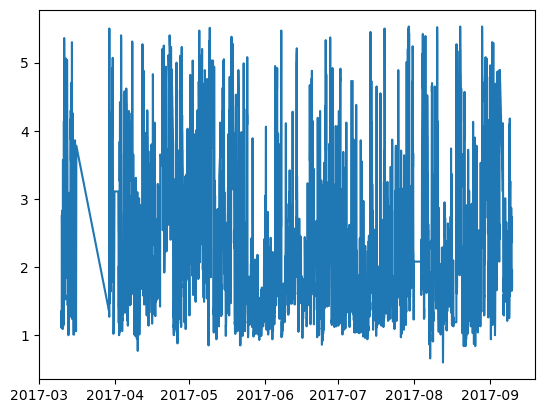

In [33]:
plt.plot('date', '%_silica_conc', data=df);

In [27]:
# Find the data gap around late March
df['date'].diff(periods=1).apply(lambda x: x.days).loc[lambda x:x>1]

26814    13.0
Name: date, dtype: float64

In [32]:
df.loc[26814,'date'], df.loc[26813,'date']
# The gap is between 3/16/17 and 3/29/17

(Timestamp('2017-03-29 12:00:00'), Timestamp('2017-03-16 05:00:00'))

In order to simplify data analysis, we only use data after 3/29/2017 so that we have continuous data. Remove all data prior to that (row index 26814).

In [36]:
# df = df.loc[26814:,]
# df.reset_index(drop=True, inplace=True)

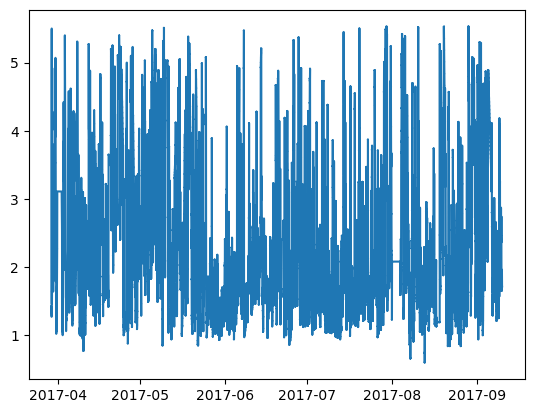

In [87]:
plt.plot('date', '%_silica_conc', data=df);

* **Smooth out data.**<br>
Data is sampled every 20 seconds, but it's not captured in the data as the format is every hour. We need to "smoothly" change the date column to include the every 20 second details.

In [56]:
# add a helper column to indicate time need to be added from date column
df['date'] = df['date'] + df.index.to_series().apply(lambda x:(x % 180) * pd.to_timedelta(20, unit='s'))
df.head()

,date,%_iron_feed,%_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_pH,ore_pulp_density,FC1_air,FC2_air,...,FC7_air,FC1_level,FC2_level,FC3_level,FC4_level,FC5_level,FC6_level,FC7_level,%_iron_conc,%_silica_conc
0,2017-03-29 12:00:00,60.18,9.34,2044.99,349.911,405.625,9.74604,1.649650,200.393,195.734,...,251.002,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36
1,2017-03-29 12:00:20,60.18,9.34,2020.55,353.064,404.402,9.74169,1.643469,200.131,196.476,...,250.828,557.839933,554.531131,659.557429,431.146,422.308,444.326,463.224,66.44,1.36
2,2017-03-29 12:00:40,60.18,9.34,2012.84,356.217,403.180,9.73733,1.637289,199.869,197.219,...,250.653,560.415400,556.806697,704.130143,433.863,430.954,440.765,461.579,66.44,1.36
3,2017-03-29 12:01:00,60.18,9.34,2007.67,359.371,401.957,9.73298,1.631108,199.607,197.961,...,250.478,562.990867,559.082262,748.702857,436.580,439.600,437.204,459.935,66.44,1.36
4,2017-03-29 12:01:20,60.18,9.34,2003.92,362.524,400.735,9.72862,1.624928,199.345,198.703,...,250.304,565.566333,561.357828,793.275571,439.296,448.246,433.643,458.290,66.44,1.36


# Analysis
- Start with linear regression
- Try 1-10 hour delay and see optimal delay

## Linear Regression

In [81]:
# Create shifts and apply linear regression
def shift_lr(data, hr_delay):
    # import modules
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    # Create copy of dataframe
    shift_df = data.copy()
    # Shift response variable and drop na rows
    shift_df['%_silica_conc'] = shift_df['%_silica_conc'].shift(-hr_delay*180)
    shift_df.dropna(inplace=True)
    # Train/test split
    y = shift_df['%_silica_conc']
    X = shift_df.drop(columns=['date', '%_silica_conc'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    # Create linear regression model
    reg = LinearRegression().fit(X_train, y_train)
    r_sq = reg.score(X_test, y_test)
    return r_sq
shift_lr(df, 2)

0.36009344754933603

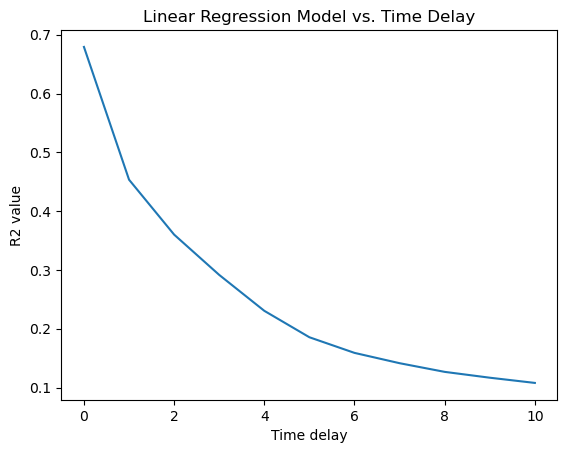

In [92]:
time = [i for i in range(11)]
r_sq = []
for i in time:
    r_sq.append(shift_lr(df, i))
plt.plot(time, r_sq);
plt.xlabel('Time delay');
plt.ylabel('R2 value');
plt.title('Linear Regression Model vs. Time Delay');

From above, we can see that the longer the shift the harder it is to predict % Silica in Concentrate.